# Library utilization

## Model Initialization

In [1]:
from neural_network.network import NeuralNetwork
from neural_network.layers.input_layer import InputLayer
from neural_network.layers.dense_layer import DenseLayer
from neural_network.layers.output_layer import OutputLayer

model = [
    InputLayer("input", 784), 
    DenseLayer("hidden", 256, activation="relu"),
    DenseLayer("hidden", 128, activation="relu"),
    DenseLayer("hidden2", 32, activation="relu"),
    OutputLayer("output", 10, activation="softmax")
]

network = NeuralNetwork(model, opt="adam" , loss="cce")
print(network)

Total params: 37610
name: input
neurons: 0
activation function: None 
params: 0
------------------------
name: hidden
neurons: 256
activation function: relu 
params: 256
------------------------
name: hidden
neurons: 128
activation function: relu 
params: 32896
------------------------
name: hidden2
neurons: 32
activation function: relu 
params: 4128
------------------------
name: output
neurons: 10
activation function: softmax 
params: 330
------------------------


## MNIST Loading

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalisation

# x_train = x_train[:3000]
# y_train = y_train[:3000]

## Training


EPOCH n°4/4
 ----- Batch n°99/100, batchlen= 600
 Batch accuracy: 0.9316666666666666/1.0


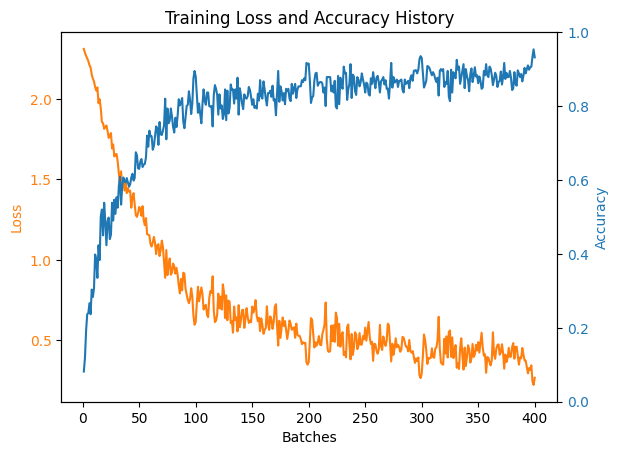

In [3]:
network.fit(samples=x_train, labels=y_train, batch_size=600, epochs=4)

## Validation

Precision: 0.89/1.00
Recall: 0.89/1.00
F1 Score: 0.89/1.00
Accuracy: 0.89/1.00


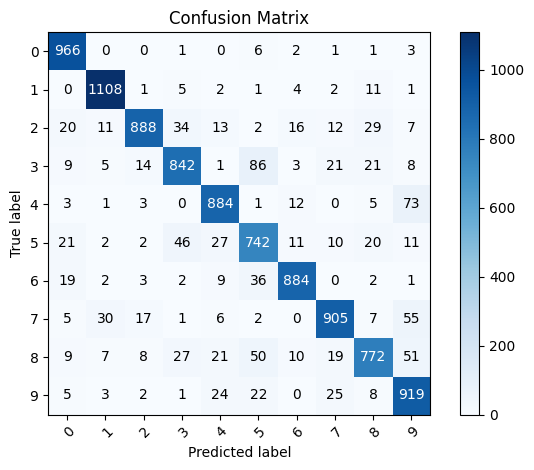

In [4]:
# x_test = x_test[:1000]
# y_test = y_test[:1000]
network.validate(x_test, y_test)

## Model saving

In [5]:
# nn.save()

## Model Loading

In [6]:
# nn.load()

## Devset validation

In [7]:
import numpy as np
import cv2
import os

def load_images_and_labels(directory):
    """
    Load images from a directory, check if they are PNGs of size 28x28 and if the filename starts with a digit.
    Parameters:
    directory (str): The directory from which to load the images.
    
    Returns:
    x_test (numpy.ndarray): Array of images.
    y_test (numpy.ndarray): Array of labels.
    """
    x_test = []
    y_test = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):  
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  
            
            if image is not None and image.shape == (28, 28):  
                first_char = filename[0]
                if first_char.isdigit():  
                    digit = int(first_char)
                    if 0 <= digit <= 9: 
                        x_test.append(image)
                        y_test.append(digit)
    
    x_test = np.array(x_test, dtype=np.uint8)
    y_test = np.array(y_test, dtype=np.uint8)
    
    assert len(x_test) == len(y_test), "Mismatch in lengths of x_test and y_test."
    
    return x_test, y_test

directory = '../data/recognized_digits/'
x_prod_test, y_prod_test = load_images_and_labels(directory)

In [8]:
x_prod_test = x_prod_test / 255.0 # normalisation

Precision: 0.50/1.00
Recall: 0.44/1.00
F1 Score: 0.47/1.00
Accuracy: 0.44/1.00


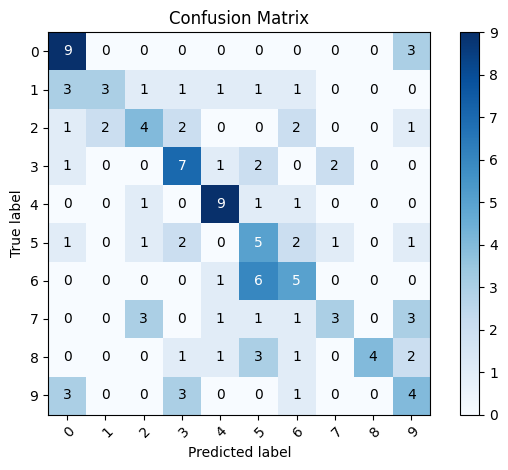

In [9]:
network.validate(x_prod_test, y_prod_test)